In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


Here wer have three data files we will start with KOI cummiliative..

# Kepler Objects of Interest (KOI)
: This dataset is a comprehensive list of all confirmed exoplanets, planetary candidates, and false positives determined on all the transits captured by Kepler. Utilizing the variables in this labeled dataset could make for a solid method of performing supervised learning from different variables in the dataset. See column “Disposition Using Kepler Data” for classification.

In [128]:
df_KOI = pd.read_csv('../Data/cumulative_2025.09.22_16.04.13.csv')

df_KOI.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [129]:
df_KOI.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [130]:
df_KOI.shape

(9564, 49)

# K2 Planets and Candidates
: This dataset is a comprehensive list of all confirmed exoplanets, planetary candidates, and false positives determined on all the transits captured by the K2 mission. See the “Archive Disposition” column for classification.

In [131]:
df_k2=pd.read_csv('../Data/k2pandc_2025.09.22_16.05.33.csv')
df_k2.head()

,pl_name,hostname,default_flag,disposition,disp_refname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,BD+20 594 b,BD+20 594,0,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,Published Confirmed,0,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,41.688644,0.003353,-0.003419,0.0,NaN,NaN,NaN,NaN,2.355454,0.310000,-0.166773,0.0,0.210139,0.027656,-0.014878,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,NaN,5703.00,50.00,-50.00,0.0,0.956122,0.098585,-0.054675,0.0,0.963861,0.029568,-0.032166,0.0,-0.06,0.080,-0.080,0.0,[Fe/H],4.38000,0.100000,-0.100000,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,1.2570,-1.2400,10.849,0.012,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,2018-04-25,2018-03,2018-02-15
1,BD+20 594 b,BD+20 594,0,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,Published Confirmed,0,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,41.685500,0.003000,-0.003100,0.0,0.241,0.019,-0.017,0.0,2.230000,0.140000,-0.110000,0.0,0.198947,0.012490,-0.009814,0.0,16.3000,6.0000,-6.1000,0.0,0.051285,0.018878,-0.019193,0.0,Mass,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,546.0,19.0,-18.0,0.0,0,<a refstr=ESPINOZA_ET_AL__2016 href=https://ui...,G,5766.00,99.00,-99.00,0.0,0.928000,0.055000,-0.040000,0.0,0.961000,0.032000,-0.029000,0.0,-0.15,0.050,-0.050,0.0,[Fe/H],4.50000,0.080000,-0.080000,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,1.2570,-1.2400,10.849,0.012,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,2018-04-25,2016-10,2016-07-28
2,BD+20 594 b,BD+20 594,1,CONFIRMED,Espinoza et al. 2016,1,1,Transit,2016,K2,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,41.685500,0.003000,-0.003000,0.0,NaN,NaN,NaN,NaN,2.578070,0.112090,-0.112090,0.0,0.230000,0.010000,-0.010000,0.0,22.2481,9.5349,-9.5349,0.0,0.070000,0.030000,-0.030000,0.0,Mass,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,NaN,5766.00,99.00,-99.00,0.0,1.080000,0.060000,-0.060000,0.0,1.670000,0.400000,-0.400000,0.0,-0.15,NaN,NaN,0.0,[Fe/H],4.50000,0.080000,-0.080000,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h34m36.27s,53.651123,+20d35m56.47s,20.599021,179.4610,1.2570,-1.2400,10.849,0.012,-0.012,9.368,0.018,-0.018,10.8644,0.000249,-0.000249,2018-04-25,2017-03,2018-04-26
3,EPIC 201111557.01,EPIC 201111557,0,CANDIDATE,Livingston et al. 2018,1,0,Transit,2018,K2,Published Candidate,0,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,2.302368,0.000105,-0.000103,0.0,NaN,NaN,NaN,NaN,1.312588,0.524177,-0.120814,0.0,0.120000,0.050000,-0.010000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=MAYO_ET_AL__2018 href=https://ui.ads...,NaN,4720.00,50.00,-50.00,0.0,0.710995,0.018609,-0.020398,0.0,NaN,NaN,NaN,NaN,-0.06,0.080,-0.080,0.0,[Fe/H],4.50000,0.100000,-0.100000,0.0,<a refstr=STASSUN_ET_AL__2019 hre

In [132]:
df_k2.columns

Index(['pl_name', 'hostname', 'default_flag', 'disposition', 'disp_refname',
       'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility',
       'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad',
       'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mas

In [133]:
df_k2.shape

(3992, 94)

# TESS Objects of Interest (TOI)
: This dataset is a comprehensive list of all confirmed exoplanets, planetary candidates (PC), false positives (FP), ambiguous planetary candidates (APC), and known planets (KP, previously identified) identified by the TESS mission so far. See column “TFOWPG Disposition” for classification.

In [134]:
df_TOI=pd.read_csv('../Data/TOI_2025.09.22_16.02.18.csv')
df_TOI.head()

,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,st_pmraerr2,st_pmralim,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_trandurh,pl_trandurherr1,pl_trandurherr2,pl_trandurhlim,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,st_tmag,st_tmagerr1,st_tmagerr2,st_tmaglim,st_dist,st_disterr1,st_disterr2,st_distlim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
0,1000.01,50365310,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,0.085,-0.085,0.0,-0.076,0.072,-0.072,0.0,2.459230e+06,0.001657,-0.001657,0,2.171348,0.000264,-0.000264,0,2.01722,0.319588,-0.319588,0,656.886099,37.778210,-37.778210,0,5.818163,1.910546,-1.910546,0,22601.948581,NaN,NaN,NaN,3127.204052,NaN,NaN,NaN,9.604000,0.013,-0.013,0,485.735,11.9515,-11.9515,0,10249.0,264.7,-264.7,0,4.19,0.07,-0.07,0,2.16986,0.072573,-0.072573,0,2019-07-24 15:58:33,2024-09-09 10:08:01
1,1001.01,88863718,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,0.102,-0.102,0.0,-15.555,0.072,-0.072,0.0,2.459988e+06,0.001916,-0.001916,0,1.931646,0.000005,-0.000005,0,3.16600,0.647000,-0.647000,0,1286.000000,1186.490000,-1186.490000,0,11.215400,2.624200,-2.624200,0,44464.500000,NaN,NaN,NaN,4045.000000,NaN,NaN,NaN,9.423440,0.006,-0.006,0,295.862,5.9100,-5.9100,0,7070.0,126.4,-126.4,0,4.03,0.09,-0.09,0,2.01000,0.090000,-0.090000,0,2019-07-24 15:58:33,2023-04-03 14:31:04
2,1002.01,124709665,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,0.206,-0.206,0.0,-2.249,0.206,-0.206,0.0,2.459225e+06,0.000625,-0.000625,0,1.867557,0.000003,-0.000003,0,1.40800,0.184000,-0.184000,0,1500.000000,1.758400,-1.758400,0,23.752900,NaN,NaN,0,2860.610000,NaN,NaN,NaN,2037.000000,NaN,NaN,NaN,9.299501,0.058,-0.058,0,943.109,106.3330,-106.3330,0,8924.0,124.0,-124.0,0,NaN,NaN,NaN,0,5.73000,NaN,NaN,0,2019-07-24 15:58:33,2022-07-11 16:02:02
3,1003.01,106997505,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,0.041,-0.041,0.0,1.640,0.055,-0.055,0.0,2.458493e+06,0.005350,-0.005350,0,2.743230,0.001080,-0.001080,0,3.16700,0.642000,-0.642000,0,383.410000,0.781988,-0.781988,0,NaN,NaN,NaN,0,1177.360000,NaN,NaN,NaN,1631.000000,NaN,NaN,NaN,9.300300,0.037,-0.037,0,7728.170,1899.5700,-1899.5700,0,5388.5,567.0,-567.0,0,4.15,1.64,-1.64,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2022-02-23 10:10:02
4,1004.01,238597883,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,0.069,-0.069,0.0,9.347,0.062,-0.062,0.0,2.459987e+06,0.003748,-0.003748,0,3.573014,0.000013,-0.000013,0,3.37000,1.029000,-1.029000,0,755.000000,1306.550000,-1306.550000,0,11.311300,3.247140,-3.247140,0,54679.300000,NaN,NaN,NaN,4260.000000,NaN,NaN,NaN,9.135500,0.006,-0.006,0,356.437,4.6175,-4.6175,0,9219.0,171.1,-171.1,0,4.14,0.07,-0.07,0,2.15000,0.060000,-0.060000,0,2019-07-24 15:58:33,2024-09-09 10:08:01


In [135]:
df_TOI.columns

Index(['toi', 'tid', 'tfopwg_disp', 'rastr', 'ra', 'decstr', 'dec', 'st_pmra',
       'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmdec', 'st_pmdecerr1',
       'st_pmdecerr2', 'st_pmdeclim', 'pl_tranmid', 'pl_tranmiderr1',
       'pl_tranmiderr2', 'pl_tranmidlim', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_trandurh', 'pl_trandurherr1',
       'pl_trandurherr2', 'pl_trandurhlim', 'pl_trandep', 'pl_trandeperr1',
       'pl_trandeperr2', 'pl_trandeplim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2',
       'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
       'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_dist',
       'st_disterr1', 'st_disterr2', 'st_distlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_logg', 'st_loggerr1', 'st_loggerr2',
       'st_logglim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
       'toi_created', 'rowupda

In [136]:
df_TOI.shape

(7668, 65)

We begin by selecting the columns that are important to train our model on, we are mainly going to use supervised technquies to train our model

In [137]:
df_KOI_selected = df_KOI[[
    'koi_period',            # Orbital period
    'koi_duration',          # Duration of the transit
    'koi_depth',             # Transit depth
    'koi_prad',              # Planetary radius
    'koi_teq',               # Equilibrium temperature
    'koi_insol',             # Insolation flux
    'koi_model_snr',         # Signal-to-noise ratio
    'koi_fpflag_nt',         # Not transit-like flag
    'koi_fpflag_ss',         # Stellar eclipse flag
    'koi_fpflag_co',         # Centroid offset flag
    'koi_fpflag_ec',         # Ephemeris match contamination flag
    'koi_steff',             # Stellar effective temperature
    'koi_slogg',             # Stellar surface gravity
    'koi_srad',              # Stellar radius
    'koi_kepmag',            # Kepler magnitude
    'koi_disposition'        # Target label (CONFIRMED, FALSE POSITIVE, CANDIDATE)
]]

df_KOI_selected.head()


,koi_period,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_srad,koi_kepmag,koi_disposition
0,9.488036,2.95750,615.8,2.26,793.0,93.59,35.8,0,0,0,0,5455.0,4.467,0.927,15.347,CONFIRMED
1,54.418383,4.50700,874.8,2.83,443.0,9.11,25.8,0,0,0,0,5455.0,4.467,0.927,15.347,CONFIRMED
2,19.899140,1.78220,10829.0,14.60,638.0,39.30,76.3,0,0,0,0,5853.0,4.544,0.868,15.436,CANDIDATE
3,1.736952,2.40641,8079.2,33.46,1395.0,891.96,505.6,0,1,0,0,5805.0,4.564,0.791,15.597,FALSE POSITIVE
4,2.525592,1.65450,603.3,2.75,1406.0,926.16,40.9,0,0,0,0,6031.0,4.438,1.046,15.509,CONFIRMED


In [138]:
df_KOI_selected.describe()

,koi_period,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_srad,koi_kepmag
count,9564.000000,9564.000000,9.201000e+03,9201.000000,9201.000000,9.243000e+03,9201.000000,9564.000000,9564.000000,9564.000000,9564.000000,9201.000000,9201.000000,9201.000000,9563.000000
mean,75.671358,5.621606,2.379134e+04,102.891778,1085.385828,7.745737e+03,259.895001,0.208595,0.232748,0.197512,0.120033,5706.823280,4.310157,1.728712,14.264606
std,1334.744046,6.471554,8.224268e+04,3077.639126,856.351161,1.592047e+05,795.806615,4.767290,0.422605,0.398142,0.325018,796.857947,0.432606,6.127185,1.385448
min,0.241843,0.052000,0.000000e+00,0.080000,25.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2661.000000,0.047000,0.109000,6.966000
25%,2.733684,2.437750,1.599000e+02,1.400000,539.000000,2.015000e+01,12.000000,0.000000,0.000000,0.000000,0.000000,5310.000000,4.218000,0.829000,13.440000
50%,9.752831,3.792600,4.211000e+02,2.390000,878.000000,1.416000e+02,23.000000,0.000000,0.000000,0.000000,0.000000,5767.000000,4.438000,1.000000,14.520000
75%,40.715178,6.276500,1.473400e+03,14.930000,1379.000000,8.702900e+02,78.000000,0.000000,0.000000,0.000000,0.000000,6112.000000,4.543000,1.345000,15.322000
max,129995.778400,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,465.000000,1.000000,1.000000,1.000000,15896.000000,5.364000,229.908000,20.003000


In [139]:
df_KOI_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_period       9564 non-null   float64
 1   koi_duration     9564 non-null   float64
 2   koi_depth        9201 non-null   float64
 3   koi_prad         9201 non-null   float64
 4   koi_teq          9201 non-null   float64
 5   koi_insol        9243 non-null   float64
 6   koi_model_snr    9201 non-null   float64
 7   koi_fpflag_nt    9564 non-null   int64  
 8   koi_fpflag_ss    9564 non-null   int64  
 9   koi_fpflag_co    9564 non-null   int64  
 10  koi_fpflag_ec    9564 non-null   int64  
 11  koi_steff        9201 non-null   float64
 12  koi_slogg        9201 non-null   float64
 13  koi_srad         9201 non-null   float64
 14  koi_kepmag       9563 non-null   float64
 15  koi_disposition  9564 non-null   object 
dtypes: float64(11), int64(4), object(1)
memory usage: 1.2+ MB


In [140]:
df_KOI_selected.isna().sum()

koi_period           0
koi_duration         0
koi_depth          363
koi_prad           363
koi_teq            363
koi_insol          321
koi_model_snr      363
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_steff          363
koi_slogg          363
koi_srad           363
koi_kepmag           1
koi_disposition      0
dtype: int64

In [141]:
df_KOI_selected[df_KOI_selected.isna().any(axis=1)].head(20)


,koi_period,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_steff,koi_slogg,koi_srad,koi_kepmag,koi_disposition
330,0.734525,6.70,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,13.220,FALSE POSITIVE
360,6.721078,7.46,NaN,NaN,NaN,NaN,NaN,1,0,0,0,NaN,NaN,NaN,14.792,FALSE POSITIVE
479,1.008617,0.91,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,15.319,CANDIDATE
493,200.611033,7.13,NaN,NaN,NaN,NaN,NaN,1,0,1,1,NaN,NaN,NaN,15.783,FALSE POSITIVE
495,1.634846,6.11,NaN,NaN,NaN,17098.4,NaN,1,0,1,1,NaN,NaN,NaN,12.647,FALSE POSITIVE
528,110.615766,5.00,NaN,NaN,NaN,NaN,NaN,1,0,0,0,NaN,NaN,NaN,13.620,FALSE POSITIVE
557,7.168827,1.29,NaN,NaN,NaN,NaN,NaN,1,0,0,0,NaN,NaN,NaN,15.602,FALSE POSITIVE
572,2.497052,3.79,NaN,NaN,NaN,NaN,NaN,1,0,0,0,NaN,NaN,NaN,10.266,FALSE POSITIVE
746,12.376793,3.85,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,11.926,CANDIDATE
752,69.627542,11.07,NaN,NaN,NaN,NaN,NaN,1,0,0,0,NaN,NaN,NaN,15.384,FALSE POSITIVE


In [142]:
# Use median imputation for all numeric missing values
for col in ['koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 
            'koi_model_snr', 'koi_steff', 'koi_slogg', 
            'koi_srad', 'koi_kepmag']:
    
    df_KOI_selected[col] = df_KOI_selected[col].fillna(df_KOI_selected[col].median())

/tmp/ipykernel_15638/233385985.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KOI_selected[col] = df_KOI_selected[col].fillna(df_KOI_selected[col].median())
/tmp/ipykernel_15638/233385985.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_KOI_selected[col] = df_KOI_selected[col].fillna(df_KOI_selected[col].median())
/tmp/ipykernel_15638/233385985.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [143]:
df_KOI_selected.isna().sum()

koi_period         0
koi_duration       0
koi_depth          0
koi_prad           0
koi_teq            0
koi_insol          0
koi_model_snr      0
koi_fpflag_nt      0
koi_fpflag_ss      0
koi_fpflag_co      0
koi_fpflag_ec      0
koi_steff          0
koi_slogg          0
koi_srad           0
koi_kepmag         0
koi_disposition    0
dtype: int64

In [144]:
df_KOI_selected.to_csv('data/df_KOI_NOT_Capped.csv', index=False)

## Univariate Analysis

### Univariate Analysis Overview
We will analyze each variable in the KOI dataset individually to understand its distribution and characteristics. This includes both categorical and numerical features.

### Categorical 

#### Categorical Features
We will examine the distribution of the main categorical variable: `koi_disposition`.

<Axes: ylabel='count'>

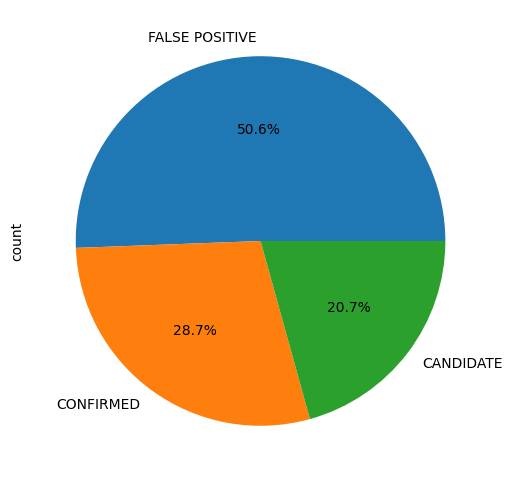

In [145]:
df_KOI_selected['koi_disposition'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))

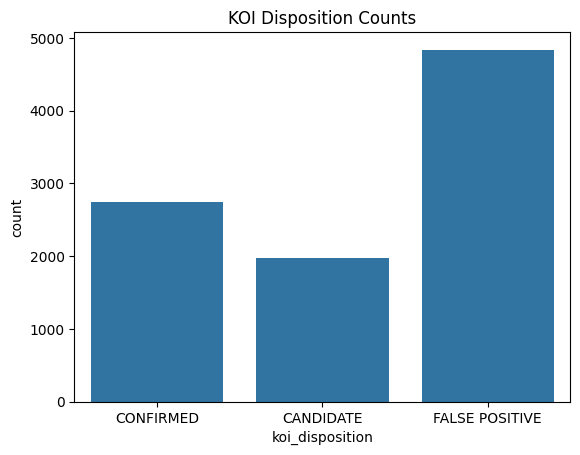

In [146]:
# Count plot for koi_disposition
sns.countplot(x='koi_disposition', data=df_KOI_selected)
plt.title('KOI Disposition Counts')
plt.show()

### Numerical

#### Numerical Features
We will analyze the distribution of each numerical feature using histograms and boxplots.

In [147]:
numerical_cols = df_KOI_selected.select_dtypes(include='number').columns.drop('koi_fpflag_nt')  # exclude binary flags optionally



<Axes: xlabel='koi_period', ylabel='Count'>

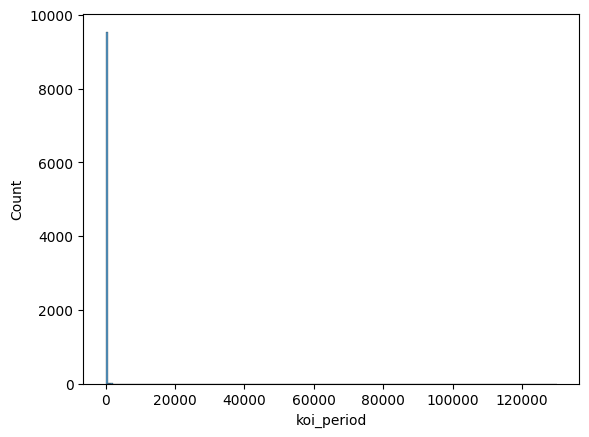

In [148]:
sns.histplot(data=df_KOI_selected, x='koi_period')

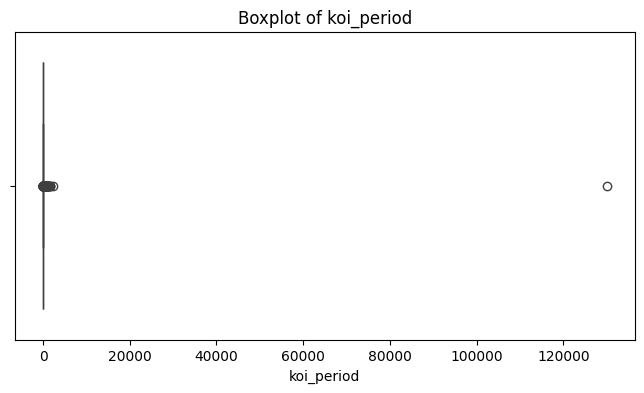

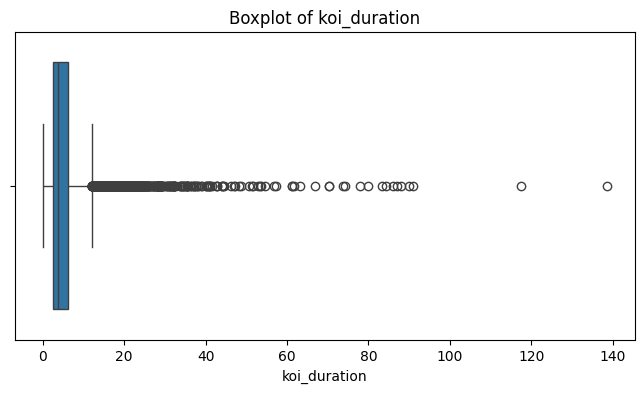

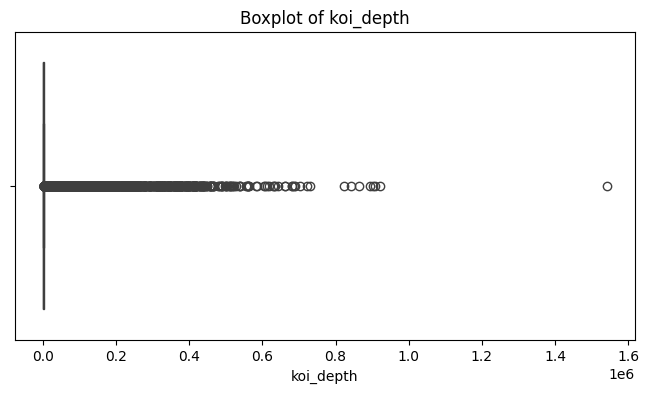

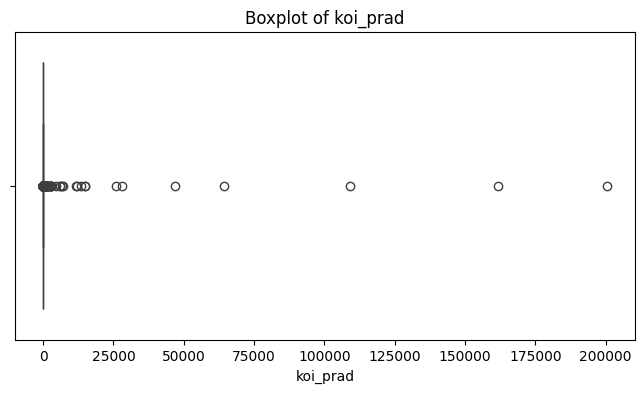

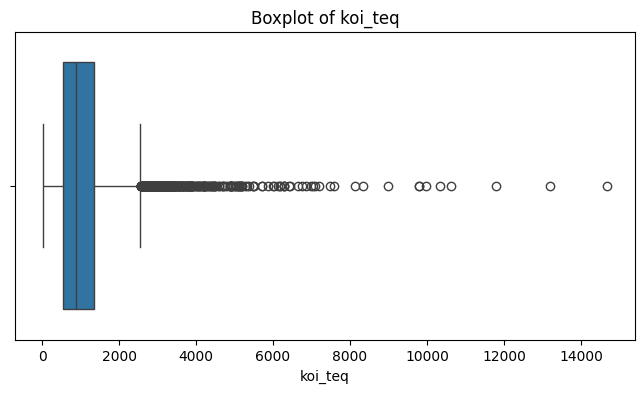

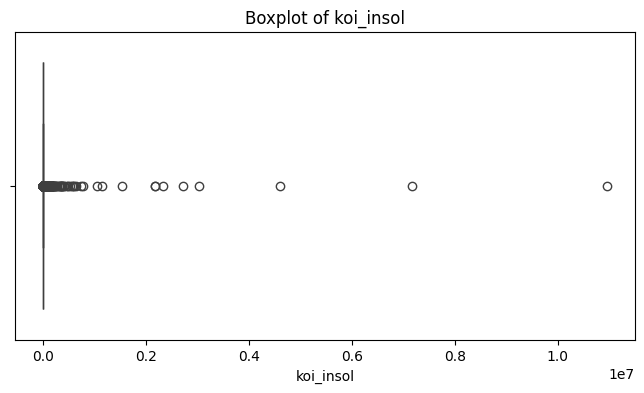

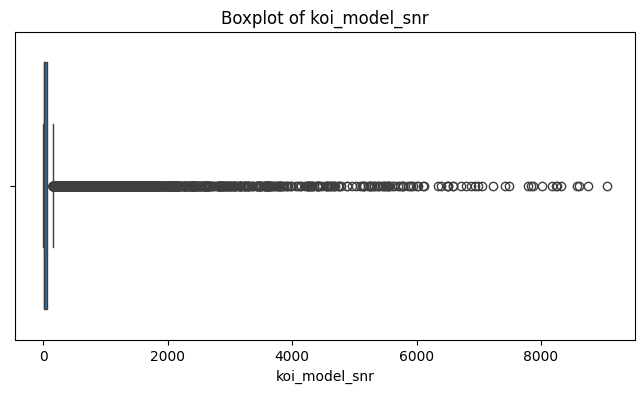

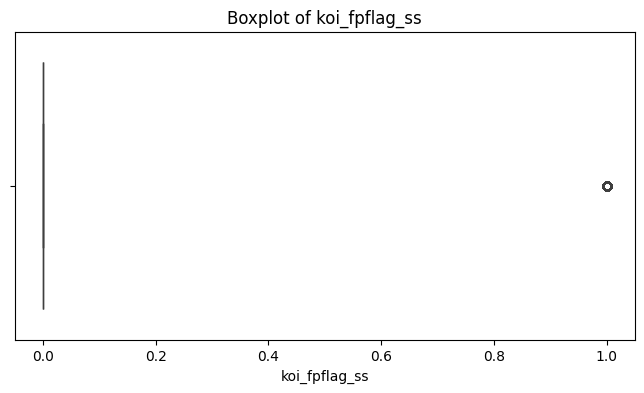

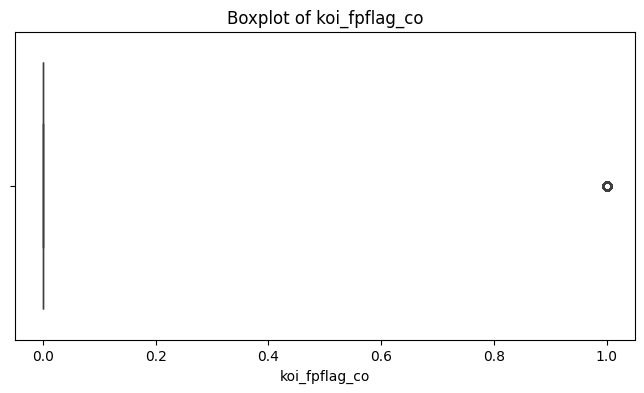

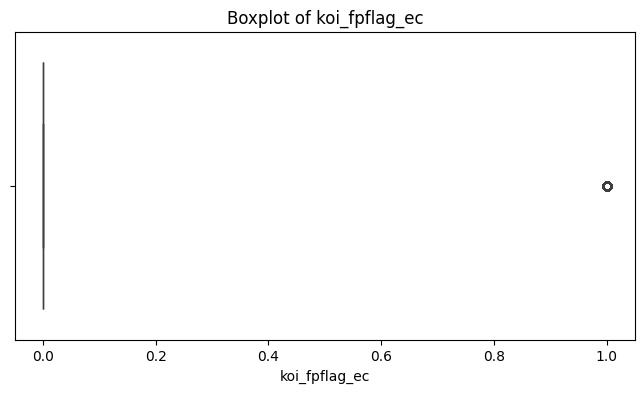

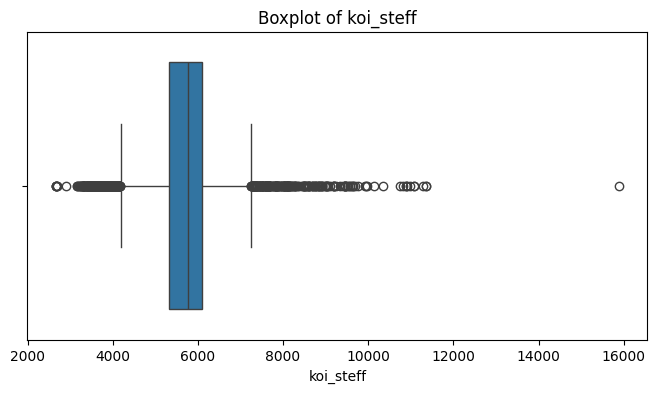

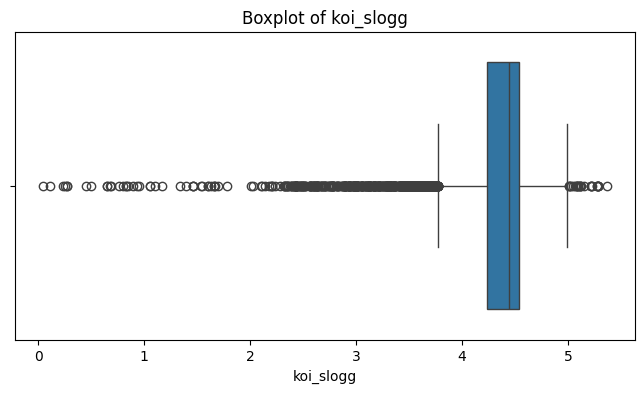

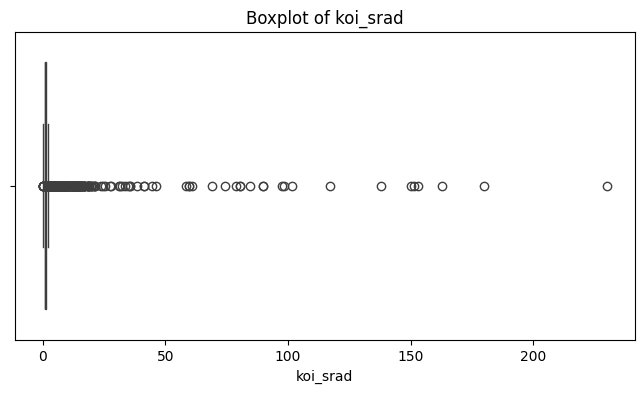

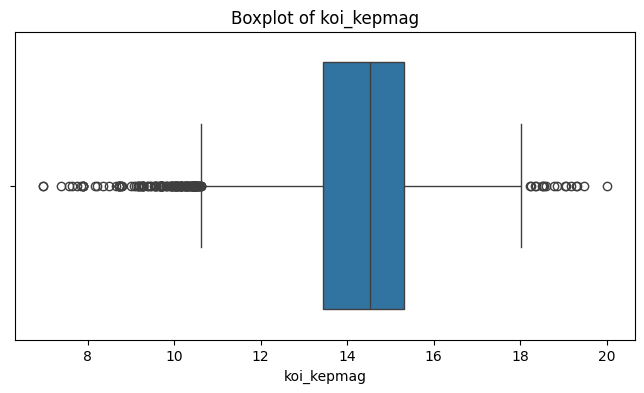

In [149]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_KOI_selected[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


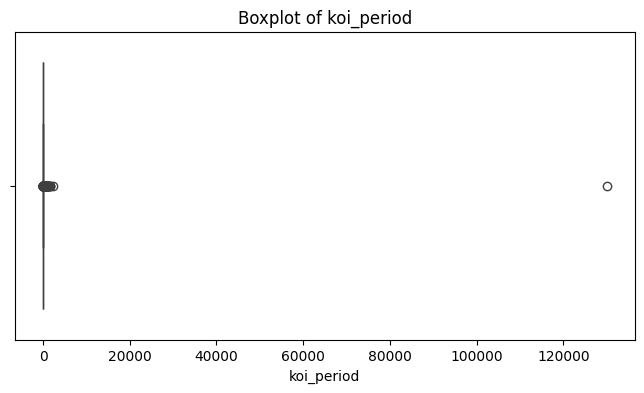

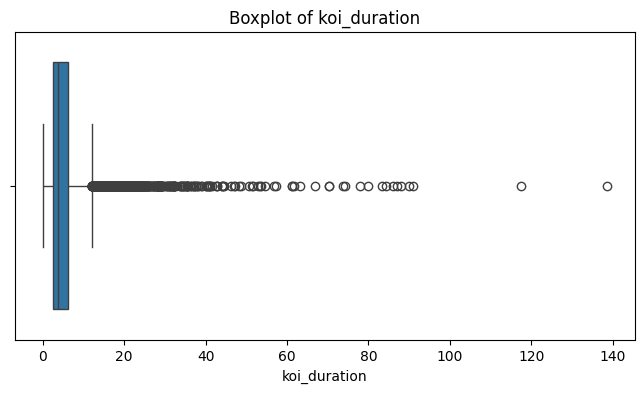

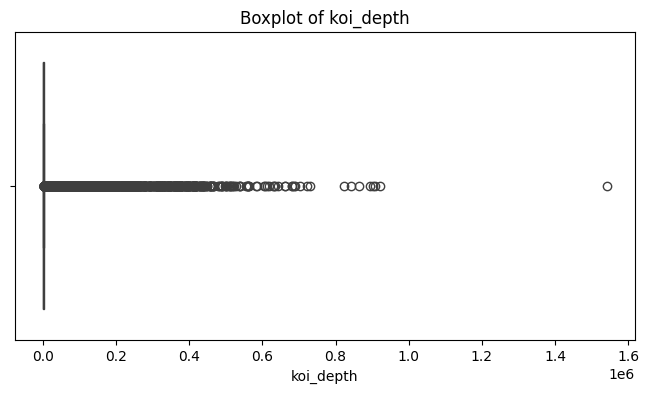

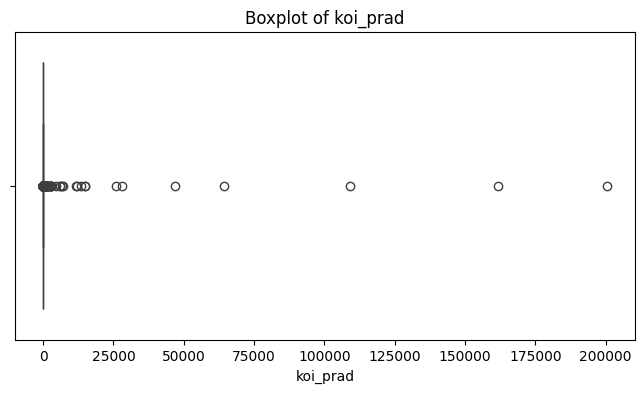

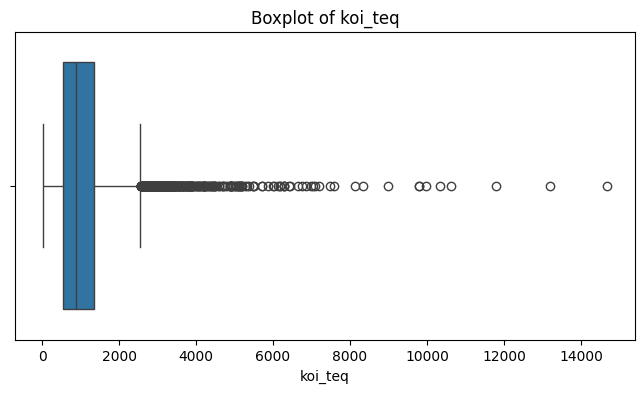

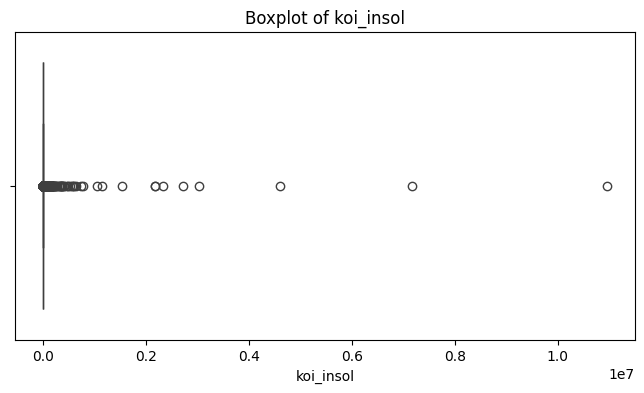

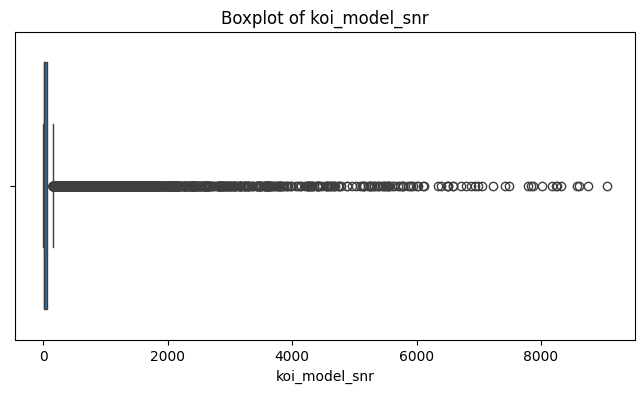

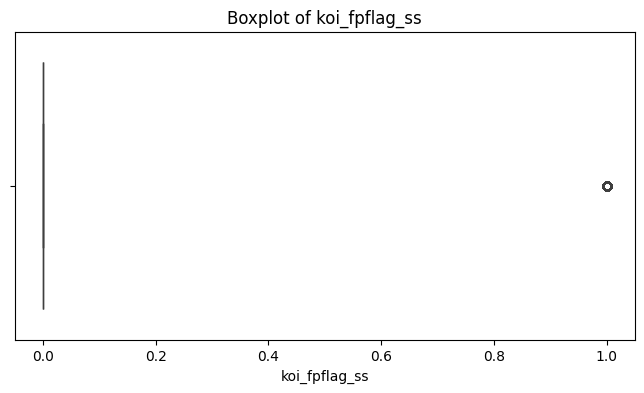

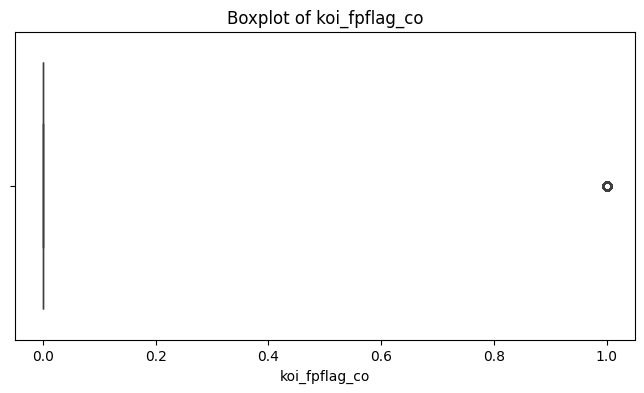

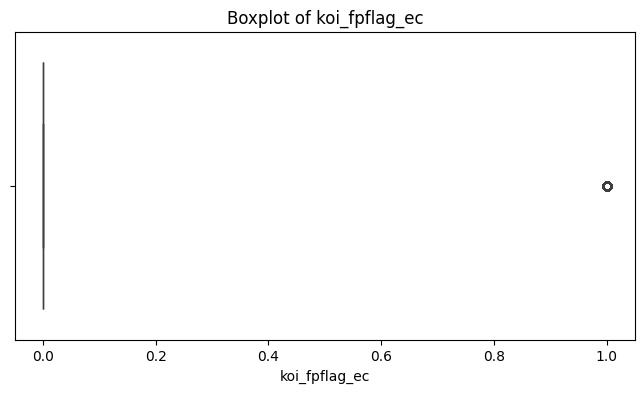

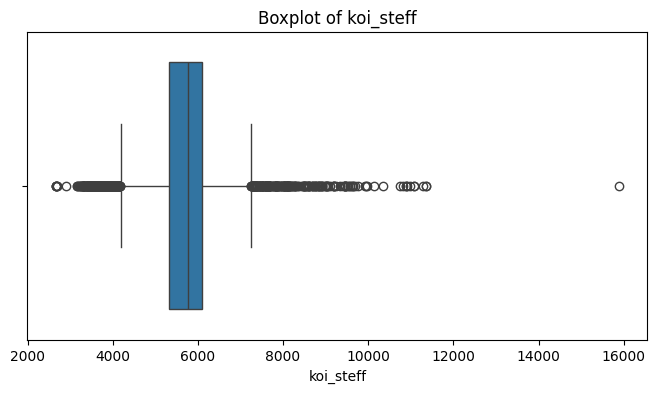

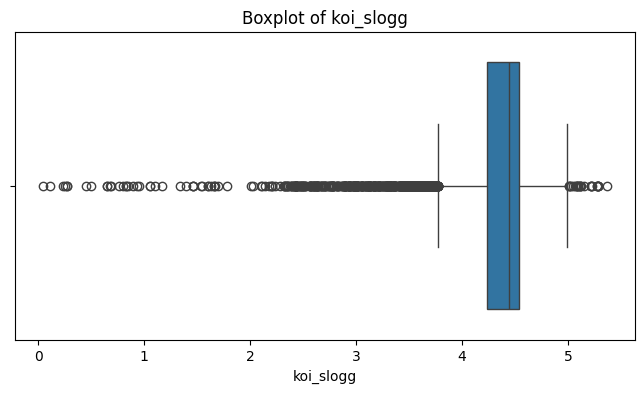

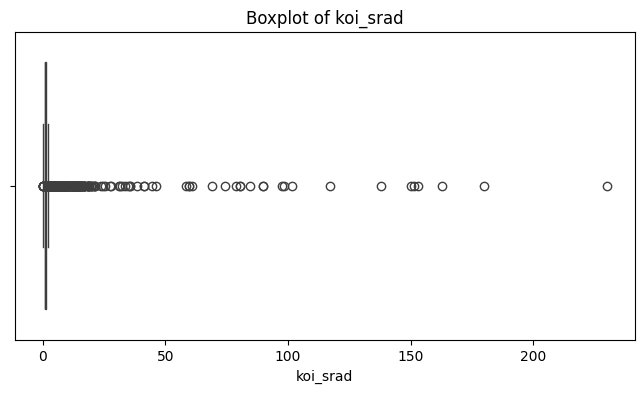

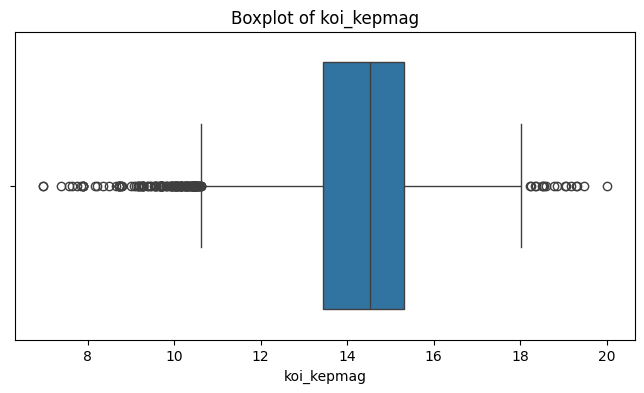

In [150]:
# Boxplots for all numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_KOI_selected[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [151]:
df_KOI_selected['koi_period'].describe()


count      9564.000000
mean         75.671358
std        1334.744046
min           0.241843
25%           2.733684
50%           9.752831
75%          40.715178
max      129995.778400
Name: koi_period, dtype: float64

In [152]:
print("Skewness:", df_KOI_selected['koi_period'].skew())
print("Kurtosis:", df_KOI_selected['koi_period'].kurt())


Skewness: 96.4593261971373
Kurtosis: 9389.73094569993


In [153]:
df_full_outliers = df_KOI_selected.copy()  # Keep original for backup


In [154]:
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

numeric_cols = [
    'koi_period', 'koi_duration', 'koi_depth', 'koi_prad',
    'koi_teq', 'koi_insol', 'koi_model_snr',
    'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag'
]
df_KOI_capped = cap_outliers_iqr(df_KOI_selected.copy(), numeric_cols)


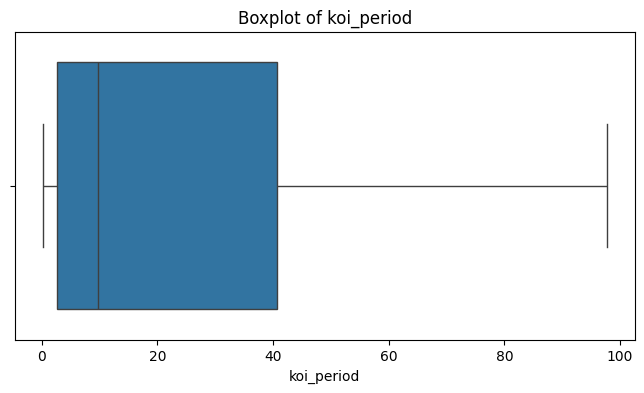

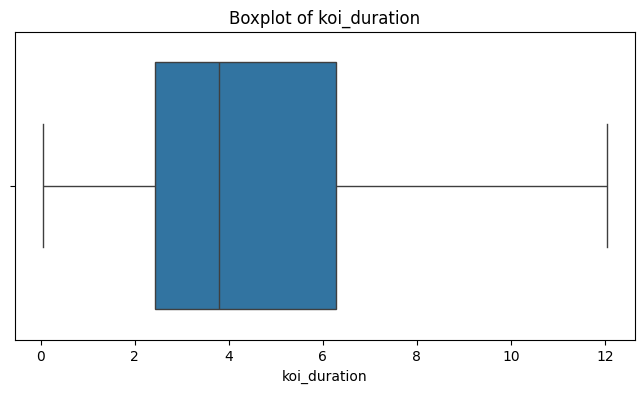

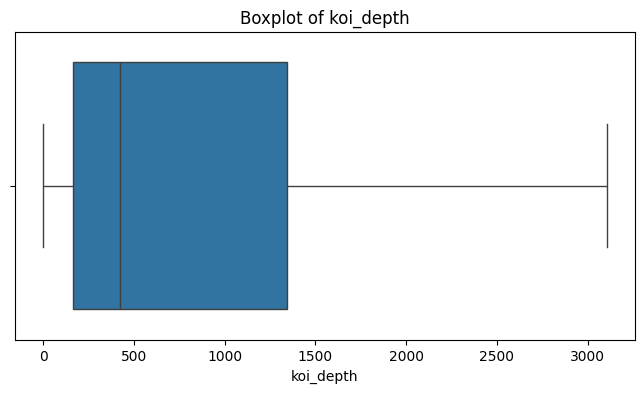

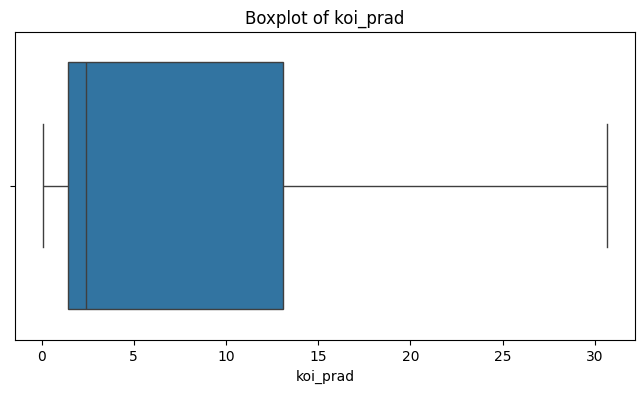

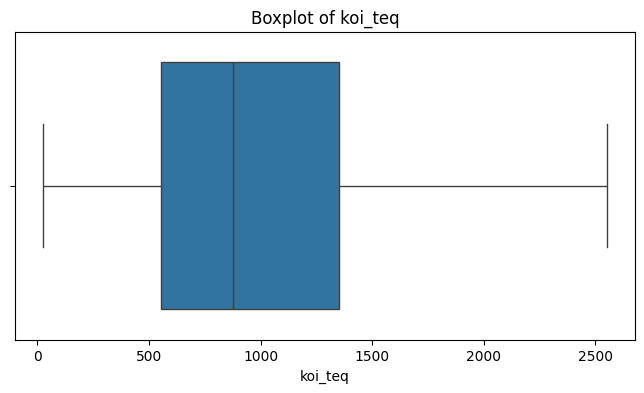

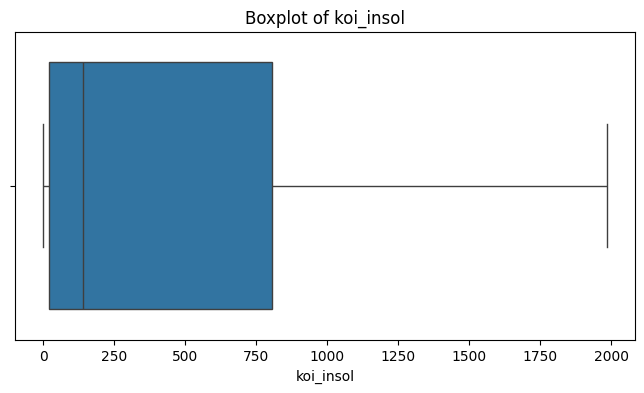

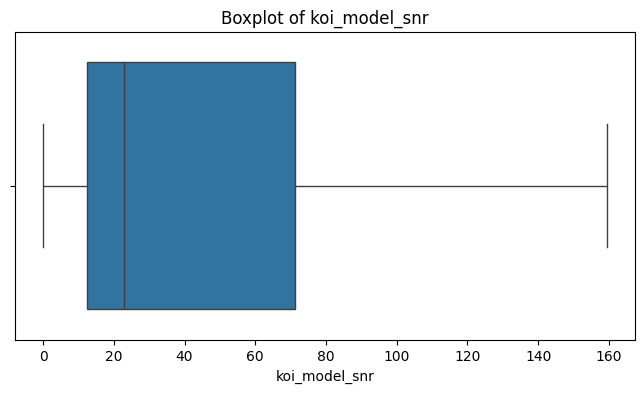

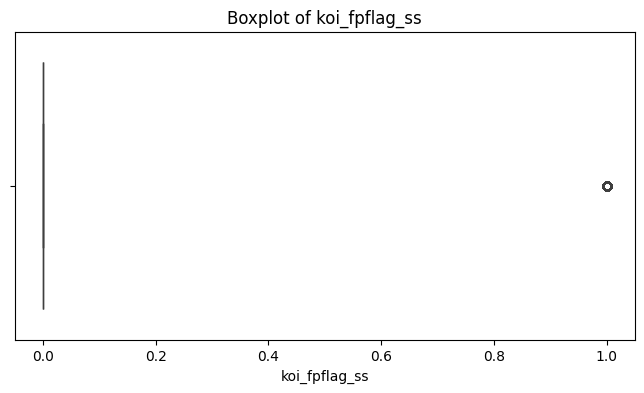

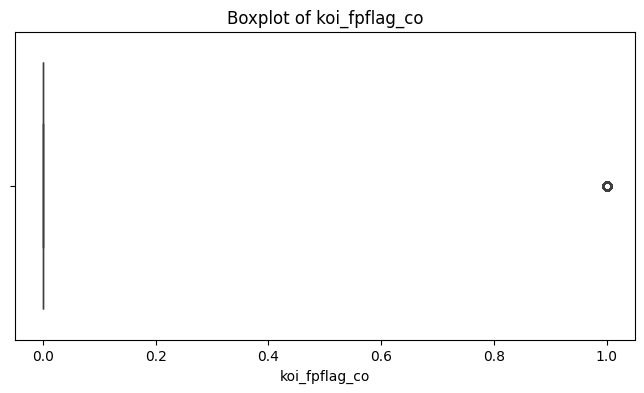

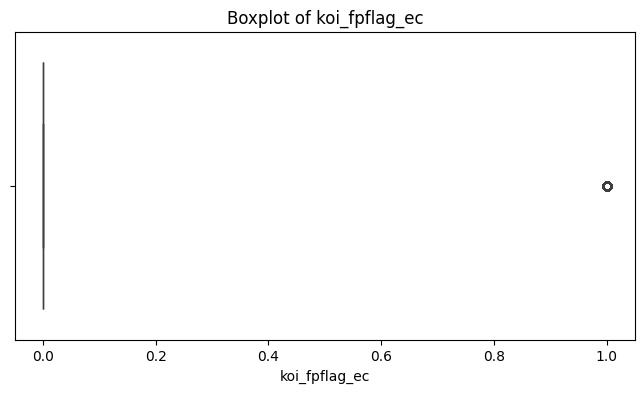

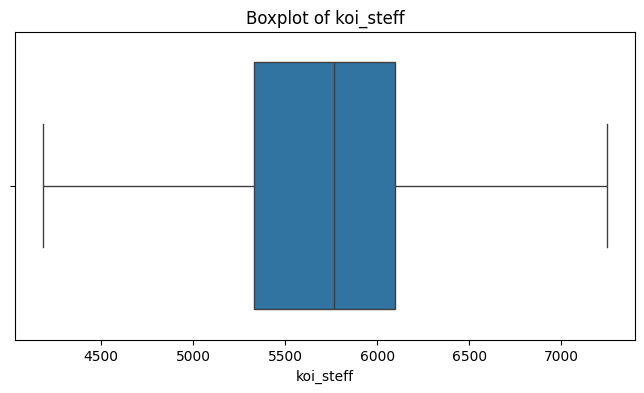

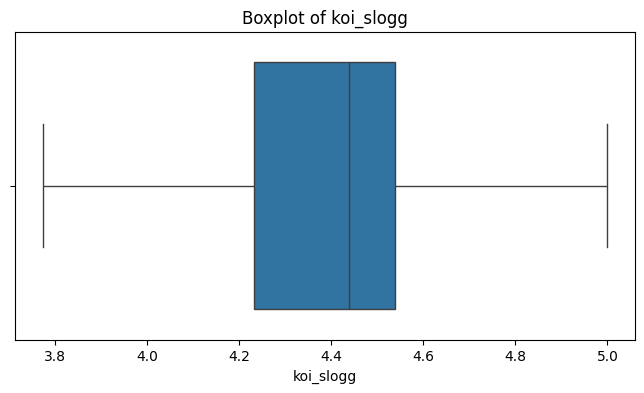

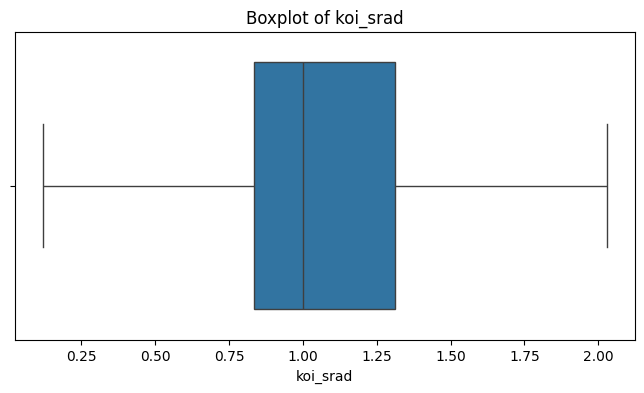

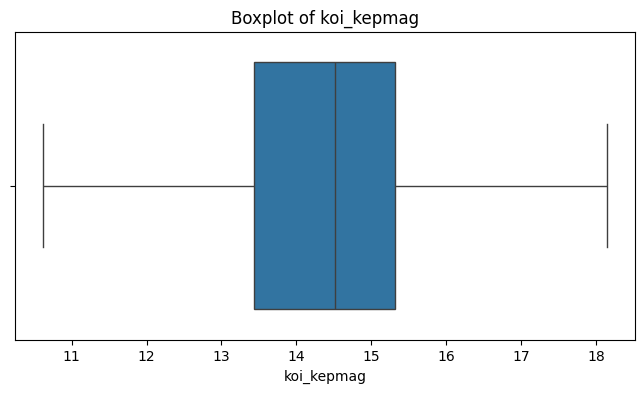

In [155]:
# Boxplots for all numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_KOI_capped[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [156]:
df_KOI_capped.shape

(9564, 16)

In [157]:
import os

os.makedirs('data', exist_ok=True)
df_KOI_capped.to_csv('data/df_KOI_capped.csv', index=False)
df_full_outliers.isna().sum()


koi_period         0
koi_duration       0
koi_depth          0
koi_prad           0
koi_teq            0
koi_insol          0
koi_model_snr      0
koi_fpflag_nt      0
koi_fpflag_ss      0
koi_fpflag_co      0
koi_fpflag_ec      0
koi_steff          0
koi_slogg          0
koi_srad           0
koi_kepmag         0
koi_disposition    0
dtype: int64